**Fundamentals of Solar Cells and Photovoltaic Systems Engineering**

**Solutions Manual - Chapter 7**

**Problem 7.5**


**Use pvlib to estimate the single-diode model parameters for the LG345N1W-A5 module at STC. Compare them with the parameters you obtained in Problem 7.4. Finally, use pvlib again to plot the resulting I-V curve using 100 points and mark the maximum power point.**

*Hint: the function ivtools.sdm.fit_desoto fits the five single-diode model parameters to the I-V parameters provided by the manufacturer at STC. The function solves a system of non-linear equations using the optimize.root function of the Python Scipy library. It is recommended to use the Levenberg-Marquardt algorithm for convergence, passing the argument root_kwargs={"method": 'lm'} to the fit_desoto function. Also, note that the diode ideality factor is managed as a part of the product n·NS·VT (nNsVth or a parameters in pvlib) instead of just n. The functions pvlib.pvsystem.i_from_v or pvsystem.singlediode solve the single diode model for any input parameters to obtain the resulting I-V curve.*


We start by importing the package [pvlib](https://pvlib-python.readthedocs.io/en/stable/) and [matplotlib.pyplot](https://matplotlib.org/stable/index.html) to plot the results

In [1]:
import pvlib
import matplotlib.pyplot as plt

We define the values in the manufacturer's datasheet and use the funcion pvlib.ivtools.sdm.fit_desoto()

In [3]:
i_sc= 10.69 #A
v_oc = 48.59 #V
i_mp = 10.18 #A
v_mp = 40.77 #V
alpha_sc = 0.04 #&/K
beta_voc = -0.27 #%/K
cells_in_series = 72
single_diodo_parameters = pvlib.ivtools.sdm.fit_desoto(v_mp, 
                             i_mp, 
                             v_oc, 
                             i_sc, 
                             alpha_sc, 
                             beta_voc, 
                             cells_in_series, 
                             EgRef=1.121, 
                             dEgdT=- 0.0002677, 
                             temp_ref=25, 
                             irrad_ref=1000, 
                             root_kwargs={"method": 'lm'})

The 5 parameters for the single-diode model are:

In [4]:
I_L=single_diodo_parameters[0]['I_L_ref']
I_o=single_diodo_parameters[0]['I_o_ref']
R_s=single_diodo_parameters[0]['R_s']
R_sh=single_diodo_parameters[0]['R_sh_ref']
n=1

The thermal voltage can be estimated as:

In [5]:
nNsVth=n*cells_in_series*0.025

Once the parameters have been obtained, PVLIB provides a function to compute the resulting I V curve with any given number of data points. The user can choose between Lambert W exact solution or numerical optimization methods (Newton-Raphson or Brent’s bisection search).

In [6]:
IVcurve=pvlib.pvsystem.singlediode(photocurrent=I_L, 
                             saturation_current=I_o, 
                             resistance_series=R_s, 
                             resistance_shunt=R_sh,
                             nNsVth=nNsVth, 
                             ivcurve_pnts=10, 
                             method='lambertw')

Text(0.5, 0, 'Current (A)')

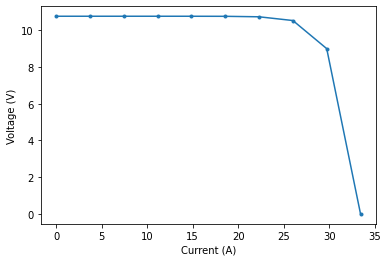

In [7]:
plt.plot(IVcurve['v'],IVcurve['i'],'.-')
plt.ylabel('Voltage (V)')
plt.xlabel('Current (A)')

We can now plot the IV curve again considering 100 points. 

In [8]:
IVcurve100=pvlib.pvsystem.singlediode(photocurrent=I_L, 
                             saturation_current=I_o, 
                             resistance_series=R_s, 
                             resistance_shunt=R_sh,
                             nNsVth=nNsVth, 
                             ivcurve_pnts=100, 
                             method='lambertw')

Text(0.5, 0, 'Current (A)')

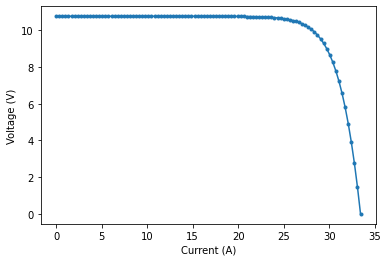

In [9]:
plt.plot(IVcurve100['v'],IVcurve100['i'],'.-')
plt.ylabel('Voltage (V)')
plt.xlabel('Current (A)')